In [10]:
import pandas as pd
df = pd.read_csv("data/SBAnational.csv")

C:\Users\a0928\AppData\Local\Temp\ipykernel_17596\774856932.py:2: DtypeWarning: Columns (0: ApprovalFY) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/SBAnational.csv")


In [36]:
#資料前處理
#把$字號拿掉轉成數值型欄位
cn = ['SBA_Appv','GrAppv','ChgOffPrinGr','BalanceGross','DisbursementGross']

for c in cn:
    df[c] = df[c].astype(str).str.replace(r'[$, ]', '', regex=True)
    df[c] = pd.to_numeric(df[c], errors='coerce')
#缺失值處理
#把想了解的y欄位有缺失值的資料刪掉
df = df.dropna(subset=['MIS_Status'])
#把ChgOffDate欄位刪掉，因為缺失值達82%
#df = df.drop(columns=['ChgOffDate'])

d:\桌面\python數據分析實習\重新做一個作品\.venv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
d:\桌面\python數據分析實習\重新做一個作品\.venv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


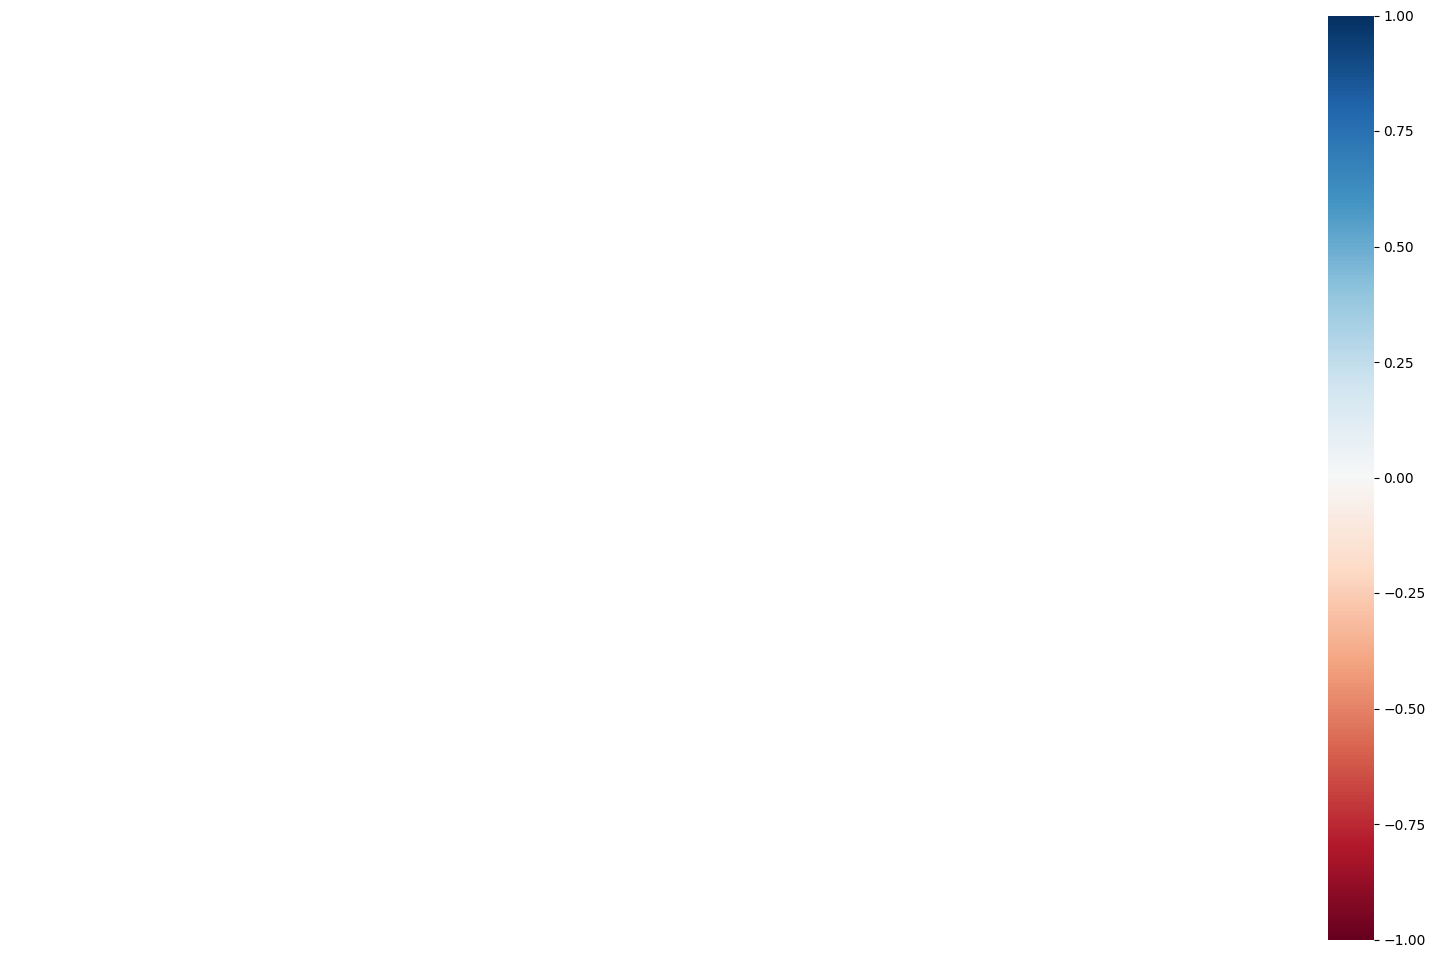

缺失資料筆數: 0
佔總資料比例: 0.00%


In [40]:
import missingno as msno
import matplotlib.pyplot as plt

# 挑選你想檢查的兩個欄位（bank,bankstate）
cols = ['Bank', 'BankState']
msno.heatmap(df[cols])
plt.show()
#發現重合程度超高，於是想建立子資料及觀察更多欄位
# 抓出 Bank 欄位缺失的所有資料
df_missing = df[df['Bank'].isnull()].copy()

# 看看這個子資料集的大小
print(f"缺失資料筆數: {df_missing.shape[0]}")
print(f"佔總資料比例: {len(df_missing) / len(df) * 100:.2f}%")


In [38]:
#經過觀察發現這群人的違約率僅為5%，遠低於整體的18%，猜測有下面兩種可能性
#1.歷史時段不同，過去的人比較不容易違約
#2.政府直接擔保或優質專案：某些極其穩定的貸款專案可能由特定機構統一管理，導致在匯入 SBA 資料庫時，Bank 欄位格式不相容或留白，但這些專案的審核非常嚴格，所以違約率極低。

#我們將這些資料先暫時保留，之後再進行更深入的分析
# 1. 建立一個新特徵：是否缺少銀行資訊 (0或1)
df['Is_Bank_Missing'] = df['Bank'].isnull().astype(int)

# 2. 將原本的 Bank 和 BankState 填補為 'Unknown'，讓模型可以處理
df['Bank'] = df['Bank'].fillna('Missing_Data')
df['BankState'] = df['BankState'].fillna('MD')

In [ ]:
df_specific_missing = df[(df['Bank'] == 'Missing_Data') & (df['BankState'] == 'MD')].copy()

# 查看結果
print(f"符合條件的筆數: {df_specific_missing.shape[0]}")
print(df_specific_missing.head())

#查看資料發現MISSING的借貸資料(GrAppv)都偏低，相較於整體資料的偏態跟紐曲都較小，代表他們的借貸行為較為穩定，違約率也較低

#原始資料做特徵工程建立一個欄位，告訴AI這些資料的人比較乖
df['Is_Missing_Group'] = (df['Bank'] == 'Missing_Data').astype(int)

符合條件的筆數: 1506
       LoanNr_ChkDgt                            Name        City State    Zip  \
407       1003113008        MOUNTVILLE WALL PAPER CO  MOUNTVILLE    PA  17554   
680       1004933009         TAYLOR BROTHERS COMPANY   CLEVELAND    OH  44114   
16108     1117074003  ASSURED CORP/SMART DRYWALL CO.      DALLAS    TX  75220   
18188     1133353008             GALESBURG GRAIN INC   GALESBURG    KS  66740   
27779     1209213009            LONE STAR FORD, INC.    LONGVIEW    TX  75606   

               Bank BankState   NAICS ApprovalDate ApprovalFY  ...  RevLineCr  \
407    Missing_Data        MD       0    27-Jun-80       1980  ...          N   
680    Missing_Data        MD       0     8-Jul-80       1980  ...          N   
16108  Missing_Data        MD  235420    10-Apr-97       1997  ...          N   
18188  Missing_Data        MD       0    15-Dec-80       1981  ...          N   
27779  Missing_Data        MD       0     7-Apr-81       1981  ...          N   

       LowDo

In [ ]:
#覺得借貸金額極端值太嚴重，可能需要先做標準化或正規化

bank 缺1500
bankstate 缺1600 上面兩種有關係

chgoffdate缺失值達82%--刪掉
mis_state的缺失值資料直接刪除

NewExist資料應該只有種類1,2但還有0、空值，把後面兩種刪掉
revlinecr遺漏4500
lowdoc遺漏2500
disbursementdate缺2300考慮刪除

In [39]:
#資料前處理-one-hot encoding
df = pd.get_dummies(df, columns=['State', 'BankState', 'ApprovalFY

SyntaxError: unterminated string literal (detected at line 2) (179012179.py, line 2)

 - 

## variable discriptions
| 欄位 | 描述|
|---|---|
| NAICS | 這些資料為描述美國經濟狀況的統計數據。NAICS 產業分類中的前兩位數用來表示所屬的經濟部門。表 2 彙整了各 2 位數產業部門及其對應的產業說明。|
| franchisecode：| 00000or000010代表沒有frabchise(沒有加盟的意思) |
|newexist: |1=existing business, 2=new business|
|noemp:|number of business employees
|term:|loan term in month
|approvalfy:|fiscal year ofcommitment(SBA 在哪一個「會計年度」核准這筆貸款)
|DateSBAcommitmentissued:|「SBA（美國小企業署）核准／發出貸款承諾的日期」
|UrbanRural:|1=Urban,2=rural,0=undefined
|RevLineCr Revolving line of credit:|Y=Yes,N=No (貸款種類是不是一筆循環貸款)
|lodoc:|y=yes,n=no是不是低文件貸款方案
|ChgOffDate | The date when aloan is declared to be in default
|DisbursementDate | Disbursement date (撥款日期)
|DisbursementGross| Currency Amount disbursed (實際撥款金額)
|BalanceGross Currency | Gross amount outstanding(尚未償還的總貸款金額)
|MIS_Status: | Loan status charged off = CHGOFF,Paid in full =PIF(charged off =呆帳,paid in full=已償還) |
|ChgOffPrinGr |  Charged-offamount👉 實際發生違約後，被銀行認列為損失的金額 |
|grappv | Gross amount of loan approved by bank 銀行核准的貸款總金額（原始貸款額）|
|sba_appv  |SBA’s guaranteed amount of approved loan SBA 對這筆貸款「提供擔保」的金額|